<a href="https://colab.research.google.com/github/Kate-Strydom/cse450/blob/main/house_price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import 

In [63]:
from sys import platform
import pandas as pd
import numpy as np
from sklearn import preprocessing, metrics, model_selection, ensemble
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt

In [11]:
# disable scientific notation
pd.set_option('display.float_format', lambda x: '%.9f' % x)
# reset
#pd.reset_option('display.float_format', silent=True)

## Data Preprocessing 

In [13]:
housing = pd.read_csv('https://raw.githubusercontent.com/byui-cse/cse450-course/master/data/housing.csv')
# data is from 2010 -2014
# inflation between 2014 and 2015 hardly changed.
zipcode = pd.read_csv('https://raw.githubusercontent.com/Kate-Strydom/cse450/main/notebooks/zipcode_washington.csv')

# merge data on zipcodes
data = housing.merge(zipcode, left_on='zipcode', right_on='zipcode')
#print(housing.info())
#print(zipcode.info())
#print(housing.head())
#print(zipcode.head())
#print(data.head())
print(data.describe())
print(data.info())

                        id        bedrooms       bathrooms     sqft_living  \
count      20000.000000000 20000.000000000 20000.000000000 20000.000000000   
mean  4580297056.713700294     3.370200000     2.115750000  2079.883100000   
std   2875294849.887989044     0.931930998     0.770134140   919.433672022   
min      1000102.000000000     0.000000000     0.000000000   290.000000000   
25%   2123049478.500000000     3.000000000     1.750000000  1430.000000000   
50%   3904955440.000000000     3.000000000     2.250000000  1910.000000000   
75%   7309825262.500000000     4.000000000     2.500000000  2550.000000000   
max   9900000190.000000000    33.000000000     8.000000000 13540.000000000   

               sqft_lot          floors      waterfront            view  \
count   20000.000000000 20000.000000000 20000.000000000 20000.000000000   
mean    15015.328950000     1.496450000     0.007550000     0.234900000   
std     39701.347537252     0.540950117     0.086564266     0.767692294 

## Data Wrangling

### remove outliers

Outliers - bedrooms

In [91]:
# remove extreme values
data2 = data[(data['bedrooms']< 33)  & (data['sqft_lot'] < 1000000) & (data['sqft_living'] < 13540) & (data['price'] < 3000000)]
data2.describe()

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price,population,median_household_income
count,19950.000000000,19950.000000000,19950.000000000,19950.000000000,19950.000000000,19950.000000000,19950.000000000,19950.000000000,19950.000000000,19950.000000000,...,19950.000000000,19950.000000000,19950.000000000,19950.000000000,19950.000000000,19950.000000000,19950.000000000,19950.000000000,19950.000000000,19950.000000000
mean,4580361019.432129860,3.365864662,2.114245614,2069.959498747,14821.220050125,1.495538847,0.006616541,0.229674185,3.409573935,7.649122807,...,1971.076791980,82.337894737,98077.963007519,47.559817303,-122.213933133,1982.499097744,12721.328170426,531854.669624060,31919.053984962,82250.618045113
std,2874781167.145298481,0.905382777,0.755802371,891.292462726,37439.811039624,0.540555509,0.081074609,0.756002030,0.651691306,1.161737729,...,29.358312102,396.960842066,53.434857623,0.138626892,0.140716083,680.368516567,27062.011957872,326572.517687387,11500.212840419,24438.128409077
min,1000102.000000000,0.000000000,0.000000000,290.000000000,520.000000000,1.000000000,0.000000000,0.000000000,1.000000000,1.000000000,...,1900.000000000,0.000000000,98001.000000000,47.155900000,-122.519000000,399.000000000,651.000000000,75000.000000000,3080.000000000,40656.000000000
25%,2123049439.500000000,3.000000000,1.800000000,1425.500000000,5033.250000000,1.000000000,0.000000000,0.000000000,3.000000000,7.000000000,...,1951.000000000,0.000000000,98033.000000000,47.470200000,-122.329000000,1481.000000000,5100.000000000,321000.000000000,22772.000000000,65321.000000000
50%,3904980150.000000000,3.000000000,2.200000000,1910.000000000,7609.500000000,1.500000000,0.000000000,0.000000000,3.000000000,7.000000000,...,1975.000000000,0.000000000,98065.000000000,47.571150000,-122.230500000,1840.000000000,7620.000000000,450000.000000000,31778.000000000,81037.000000000
75%,7309050175.000000000,4.000000000,2.500000000,2540.000000000,10651.500000000,2.000000000,0.000000000,0.000000000,4.000000000,8.000000000,...,1997.000000000,0.000000000,98117.000000000,47.678100000,-122.124000000,2360.000000000,10073.250000000,640000.000000000,40610.000000000,93573.000000000
max,9900000190.000000000,11.000000000,7.500000000,8670.000000000,982998.000000000,3.500000000,1.000000000,4.000000000,5.000000000,13.000000000,...,2015.000000000,2015.000000000,98199.000000000,47.777600000,-121.315000000,6210.000000000,871200.000000000,2998000.000000000,60920.000000000,182308.000000000


In [92]:
# remove timestamp on data
data2['date'] = pd.to_datetime(data2['date'])
data2.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price,population,median_household_income
0,1565930130,2014-11-04,4,3.200000000,3760,4675,2.000000000,0,0,3,...,2007,0,98038,47.386200000,-122.048000000,3280,4033,429900.000000000,34076,93573
1,6699940320,2015-04-13,4,2.500000000,2600,5188,2.000000000,0,0,3,...,2005,0,98038,47.345100000,-122.040000000,2610,5188,359900.000000000,34076,93573
2,5416500260,2014-09-08,3,2.500000000,1890,3629,2.000000000,0,0,3,...,2005,0,98038,47.361300000,-122.041000000,1980,4000,285000.000000000,34076,93573
3,1442700430,2014-08-08,5,2.500000000,3180,23809,1.000000000,0,0,3,...,1978,0,98038,47.372700000,-122.054000000,2500,15778,499950.000000000,34076,93573
4,522069119,2015-05-12,3,2.500000000,2720,62310,1.000000000,0,0,3,...,1985,0,98038,47.416800000,-122.074000000,2770,204296,550000.000000000,34076,93573


## Baseline model 

In [93]:
 # Get our target variable and features and split them into test and train datasets
features = ['bedrooms', 'bathrooms','sqft_living', 'sqft_lot', 'floors', 'waterfront', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'sqft_living15','sqft_lot15']
X = data2[features]
y = data2['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=24)

In [94]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(13965, 14)
(13965,)
(5985, 14)
(5985,)


In [95]:
gbr = GradientBoostingRegressor(random_state=0)
baseline = gbr.fit(X_train, y_train)
baseline.get_params(deep=True)

{'alpha': 0.9,
 'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'squared_error',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': 0,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [96]:
# Get predictions for our test data
predictions = gbr.predict(X_test)
predictions

array([951336.34064364, 480006.12786143, 463586.04568672, ...,
       221763.29680926, 368285.52647886, 405587.76710719])

In [97]:
# Compute the Root Mean Squared Error of the predictions

result = mean_squared_error(y_test, predictions, squared=False)
result

# Off by $169 949 on average

169948.58230716953

## Baseline Improvement.

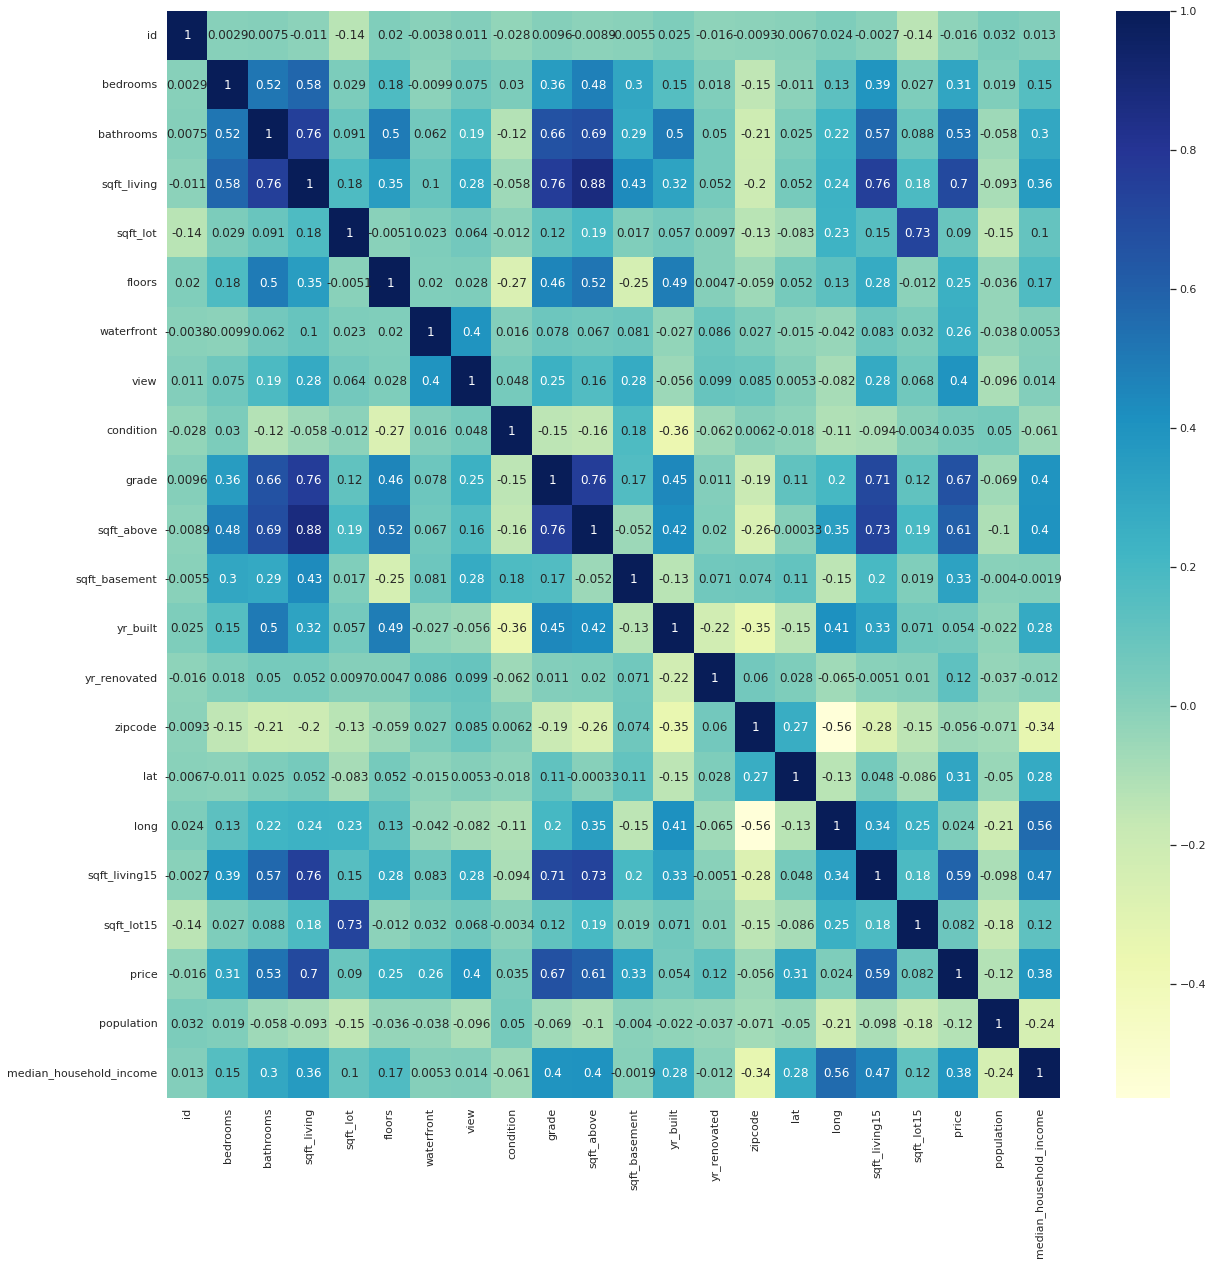

In [98]:
data2.corr()

sns.set(rc = {'figure.figsize':(20,20)})

# plotting correlation heatmap
dataplot = sns.heatmap(data.corr(), cmap="YlGnBu", annot=True)
  
# displaying heatmap
plt.show()

In [99]:
# drop variables not correlated with price
numeric = ['bedrooms', 'bathrooms','sqft_living', 'floors', 'waterfront', 'grade', 'sqft_above', 'sqft_basement', 'median_household_income']
X = data2[numeric]
y = data2['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=24)

https://www.analyticsvidhya.com/blog/2020/04/feature-scaling-machine-learning-normalization-standardization/

### Scale Features

In [100]:
# Create an instance of the transform object we're going to use
scaler = MinMaxScaler()
X_train['bedrooms_scaled'] = scaler.fit_transform(X_train[['bedrooms']])
X_train['bathrooms_scaled'] = scaler.fit_transform(X_train[['bathrooms']])
X_train['sqft_living_scaled'] = scaler.fit_transform(X_train[['sqft_living']])
X_train['floors_scaled'] = scaler.fit_transform(X_train[['floors']])
X_train['waterfront_scaled'] = scaler.fit_transform(X_train[['waterfront']])
X_train['grade_scaled'] = scaler.fit_transform(X_train[['grade']])
X_train['sqft_above_scaled'] = scaler.fit_transform(X_train[['sqft_above']])
X_train['sqft_basement_scaled'] = scaler.fit_transform(X_train[['sqft_basement']])
X_train['median_household_income_scaled'] = scaler.fit_transform(X_train[['median_household_income']])

In [101]:
X_test['bedrooms_scaled'] = scaler.fit_transform(X_test[['bedrooms']])
X_test['bathrooms_scaled'] = scaler.fit_transform(X_test[['bathrooms']])
X_test['sqft_living_scaled'] = scaler.fit_transform(X_test[['sqft_living']])
X_test['floors_scaled'] = scaler.fit_transform(X_test[['floors']])
X_test['waterfront_scaled'] = scaler.fit_transform(X_test[['waterfront']])
X_test['grade_scaled'] = scaler.fit_transform(X_test[['grade']])
X_test['sqft_above_scaled'] = scaler.fit_transform(X_test[['sqft_above']])
X_test['sqft_basement_scaled'] = scaler.fit_transform(X_test[['sqft_basement']])
X_test['median_household_income_scaled'] = scaler.fit_transform(X_test[['median_household_income']])

In [102]:
# drop variables not correlated with price
scaled_features = ['bedrooms_scaled', 'bathrooms_scaled','sqft_living_scaled', 'floors_scaled', 'waterfront_scaled', 'grade_scaled', 'sqft_above_scaled', 'sqft_basement_scaled', 'median_household_income_scaled']
X_train_scaled = X_train[scaled_features]
X_test_scaled = X_test[scaled_features]


In [104]:
print(X_train.head())
print(X_test.head())

      bedrooms   bathrooms  sqft_living      floors  waterfront  grade  \
5266         4 3.200000000         3780 1.000000000           0     11   
7544         3 1.800000000         1610 1.000000000           0      8   
9878         4 2.800000000         2350 2.000000000           0      7   
1762         3 1.500000000         1580 1.000000000           0      8   
6456         2 1.800000000         1550 1.000000000           0      7   

      sqft_above  sqft_basement  median_household_income  bedrooms_scaled  \
5266        2240           1540                   111216      0.400000000   
7544        1610              0                    81221      0.300000000   
9878        2350              0                    93486      0.400000000   
1762         900            680                    91199      0.300000000   
6456         830            720                    85040      0.200000000   

      bathrooms_scaled  sqft_living_scaled  floors_scaled  waterfront_scaled  \
5266       0

In [105]:
gbr = GradientBoostingRegressor(random_state=0)
scaled = gbr.fit(X_train_scaled, y_train)
scaled.get_params(deep=True)

{'alpha': 0.9,
 'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'squared_error',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': 0,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [106]:
# Get predictions for our test data
predictions_scaled = gbr.predict(X_test_scaled)
predictions_scaled

array([969822.3574412 , 475861.38419772, 510681.53282832, ...,
       279594.55318725, 297902.97674807, 355143.68388794])

In [107]:
# Compute the Root Mean Squared Error of the predictions

result_scaled = mean_squared_error(y_test, predictions_scaled, squared=False)
result_scaled

# Off by $158 683 on average

158683.14268346914

### XGBoost Regressor